<a href="https://colab.research.google.com/github/adrichanilham/Bigdata-dan-Mesinlearning/blob/main/MIN4_DecisionTree_Final_Web_App_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Muat data dari file CSV yang sudah diunggah
# Sesuaikan 'delimiter' dengan yang ada pada file Anda, yaitu ';'
df = pd.read_csv('data_pendaftar_MIN4_DecisionTree_ready.csv', delimiter=';')

print("5 Baris Pertama Data:")
print(df.head())
print("\nInformasi Data:")
df.info()

5 Baris Pertama Data:
  ID_Siswa             Nama Pendaftar           Asal TK/RA  \
0     S001      HAZIQAH ALTHAFUZZAHRA  TK. MIFTAHUL JANNAH   
1     S002        Sauqi Dylan Arzhifa     TK ISLAM YANNIRA   
2     S003    Sheeryn Andina Almahyra  TK. MIFTAHUL JANNAH   
3     S004         Dafiq Kazain Khair        Tk pertiwi VI   
4     S005  AQILA MISHA SHAFANA FERYA      TK MARDHATILLAH   

  Nilai_Rapor_Calistung Prestasi_Non_Akademik Jarak_Rumah Status_Ekonomi  \
0                Sedang             Tidak Ada        Jauh          Mampu   
1                Sedang             Tidak Ada       Dekat   Kurang Mampu   
2                Tinggi                   Ada       Dekat          Mampu   
3                Tinggi                   Ada       Dekat          Mampu   
4                Sedang             Tidak Ada       Dekat   Kurang Mampu   

  Jumlah_Saudara Hasil_Wawancara       Keputusan  
0         Banyak          Kurang        Diterima  
1         Banyak            Baik  Tidak Diteri

1.2 Encoding Data Kategorikal

Algoritma Decision Tree (dan sebagian besar model machine learning) memerlukan input berupa data numerik. Kita harus mengubah kolom kategorikal menjadi angka.

Kolom Ordinal/Biner:
Kolom seperti Nilai_Rapor_Calistung, Hasil_Wawancara, dan Keputusan bersifat ordinal (berjenjang) atau biner.

In [2]:
# 1. Encoding Kolom Ordinal (Berjenjang)
nilai_rapor_map = {'Rendah': 1, 'Sedang': 2, 'Tinggi': 3}
wawancara_map = {'Kurang': 1, 'Cukup': 2, 'Baik': 3}

df['Nilai_Rapor_Calistung_Encoded'] = df['Nilai_Rapor_Calistung'].map(nilai_rapor_map)
df['Hasil_Wawancara_Encoded'] = df['Hasil_Wawancara'].map(wawancara_map)

# 2. Encoding Kolom Biner (Prestasi Non-Akademik)
prestasi_map = {'Ada': 1, 'Tidak Ada': 0}
df['Prestasi_Non_Akademik_Encoded'] = df['Prestasi_Non_Akademik'].map(prestasi_map)

# 3. Encoding Target (Keputusan)
# LabelEncoder lebih cepat untuk kolom biner (Diterima/Tidak Diterima)
le = LabelEncoder()
df['Keputusan_Encoded'] = le.fit_transform(df['Keputusan'])
# Diterima -> 0, Tidak Diterima -> 1 (Perlu dicek urutan LabelEncoder!)
# print(le.classes_) # Cek kelas yang di-encode
# Jika Diterima = 0 dan Tidak Diterima = 1, kita akan menggunakan ini.

**Kolom Nominal:**

Kolom seperti Jarak_Rumah, Status_Ekonomi, dan Jumlah_Saudara akan di-encode menggunakan One-Hot Encoding.

In [3]:
# Pilih kolom nominal (non-ordinal)
nominal_cols = ['Jarak_Rumah', 'Status_Ekonomi', 'Jumlah_Saudara']

# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols, prefix=nominal_cols, drop_first=True)

**1.3 Pemilihan Fitur (X) dan Target (y)**

Pilih kolom yang sudah di-encode sebagai fitur (X) dan kolom target (y).

In [4]:
# Daftar fitur yang akan digunakan (Termasuk hasil One-Hot Encoding)
feature_cols = [
    'Nilai_Rapor_Calistung_Encoded',
    'Hasil_Wawancara_Encoded',
    'Prestasi_Non_Akademik_Encoded'
]

# Tambahkan kolom One-Hot Encoding secara dinamis
one_hot_cols = [col for col in df_encoded.columns if any(p in col for p in nominal_cols)]
feature_cols.extend(one_hot_cols)

# Definisi Fitur (X) dan Target (y)
X = df_encoded[feature_cols]
y = df_encoded['Keputusan_Encoded']

print("\nFitur yang Digunakan (X):")
print(X.head())


Fitur yang Digunakan (X):
   Nilai_Rapor_Calistung_Encoded  Hasil_Wawancara_Encoded  \
0                              2                        1   
1                              2                        3   
2                              3                        1   
3                              3                        1   
4                              2                        1   

   Prestasi_Non_Akademik_Encoded  Jarak_Rumah_Jauh  Status_Ekonomi_Mampu  \
0                              0              True                  True   
1                              0             False                 False   
2                              1             False                  True   
3                              1             False                  True   
4                              0             False                 False   

   Jumlah_Saudara_Sedikit  
0                   False  
1                   False  
2                   False  
3                   False  
4        

**1.4 Pembagian Data Latih dan Uji (Splitting)**

Pisahkan data menjadi set pelatihan (training) dan pengujian (testing) untuk mengevaluasi kinerja model secara objektif.

In [5]:
# Split data, 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nUkuran data pelatihan (X_train): {X_train.shape}")
print(f"Ukuran data pengujian (X_test): {X_test.shape}")


Ukuran data pelatihan (X_train): (100, 6)
Ukuran data pengujian (X_test): (26, 6)


**Langkah 2: Pelatihan Model Decision Tree**

melatih model Decision Tree menggunakan data pelatihan.

In [6]:
# Inisialisasi model Decision Tree
# random_state=42 untuk hasil yang konsisten
# Anda bisa mengatur parameter lain seperti max_depth atau criterion (gini/entropy)
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Latih model menggunakan data training
model_dt.fit(X_train, y_train)

print("Model Decision Tree Berhasil Dilatih!")

Model Decision Tree Berhasil Dilatih!


**Langkah 3: Evaluasi Model**

Evaluasi model menggunakan data pengujian untuk mengukur seberapa baik kinerja prediksi model.

**3.1 Prediksi dan Akurasi**

In [7]:
# Lakukan prediksi pada data test
y_pred = model_dt.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print(f"\n* * * Hasil Evaluasi Model Decision Tree * * *")
print(f"Akurasi Model: {accuracy*100:.2f}%")


* * * Hasil Evaluasi Model Decision Tree * * *
Akurasi Model: 34.62%


**3.2 Matriks Kebingungan (Confusion Matrix) dan Laporan Klasifikasi**

Matriks Kebingungan memberikan rincian tentang prediksi yang benar dan salah.

In [8]:
# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan nama kelas (sesuai urutan LabelEncoder.classes_)
# Jika 'Diterima' = 0 dan 'Tidak Diterima' = 1
target_names = ['Diterima', 'Tidak Diterima']

print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=target_names, columns=target_names))

print("\nClassification Report (Presisi, Recall, F1-Score):")
print(classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix:
                Diterima  Tidak Diterima
Diterima               6               8
Tidak Diterima         9               3

Classification Report (Presisi, Recall, F1-Score):
                precision    recall  f1-score   support

      Diterima       0.40      0.43      0.41        14
Tidak Diterima       0.27      0.25      0.26        12

      accuracy                           0.35        26
     macro avg       0.34      0.34      0.34        26
  weighted avg       0.34      0.35      0.34        26



**Langkah 4: Visualisasi Pohon Keputusan**

Visualisasi adalah keunggulan utama dari Decision Tree, karena memungkinkan interpretasi aturan pengambilan keputusan model.

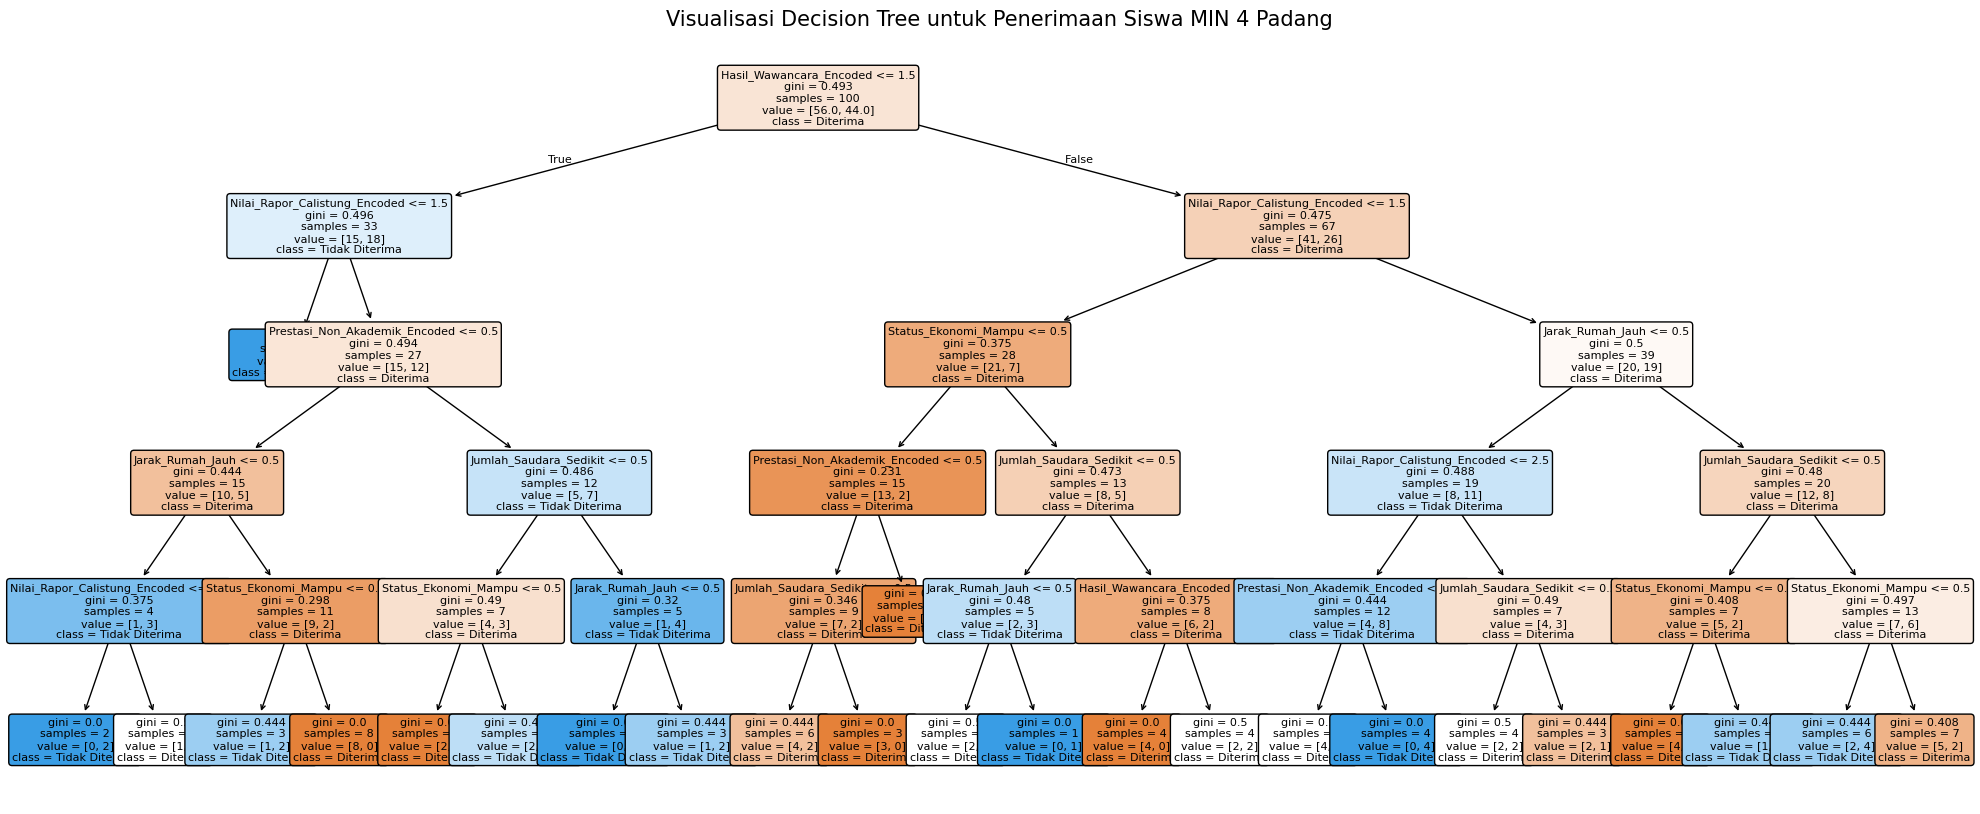

In [9]:
# Visualisasi Pohon Keputusan
plt.figure(figsize=(25, 10))
plot_tree(
    model_dt,
    filled=True,
    rounded=True,
    class_names=target_names,
    feature_names=X.columns.tolist(),
    fontsize=8
)
plt.title("Visualisasi Decision Tree untuk Penerimaan Siswa MIN 4 Padang", fontsize=15)
plt.show()

**selesai**

**1.Menyimpan Model dan Encoder (Persistence)**

Sebelum membuat aplikasi web, perlu menyimpan model Decision Tree (model_dt) dan Label Encoder (le) yang sudah dilatih agar bisa dimuat kembali di dalam aplikasi Streamlit. langkah ini akan menggunakan pustaka pickle.

In [10]:
import pickle

# 1. Simpan Model Decision Tree
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model_dt, file)
print("Model Decision Tree berhasil disimpan.")

# 2. Simpan Label Encoder (untuk mapping Diterima/Tidak Diterima)
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)
print("Label Encoder berhasil disimpan.")

# 3. Simpan Daftar Fitur (Nama kolom yang digunakan X)
feature_names = X.columns.tolist()
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)
print("Daftar Fitur berhasil disimpan.")

Model Decision Tree berhasil disimpan.
Label Encoder berhasil disimpan.
Daftar Fitur berhasil disimpan.


**2. Membuat Script Aplikasi Web (app.py)**
Buat file Python baru bernama app.py. File ini akan berisi logika aplikasi Streamlit.

In [11]:
# Tulis konten aplikasi Streamlit ke dalam file app.py di Colab
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np

# --- 1. Memuat Model dan Tools ---
try:
    # Muat Model
    with open('decision_tree_model.pkl', 'rb') as file:
        model = pickle.load(file)

    # Muat Label Encoder
    with open('label_encoder.pkl', 'rb') as file:
        le = pickle.load(file)
        # Pastikan kelas target sesuai
        target_names = le.classes_

    # Muat Daftar Fitur
    with open('feature_names.pkl', 'rb') as file:
        feature_names = pickle.load(file)

except FileNotFoundError:
    st.error("File model atau encoder tidak ditemukan. Pastikan Anda sudah menjalankan Langkah 1.")
    st.stop()


# --- 2. Konfigurasi Mapping Data Input ---
# Mapping yang sama seperti pada tahap preprocessing
NILAI_RAPOR_MAP = {'Rendah': 1, 'Sedang': 2, 'Tinggi': 3}
WAWANCARA_MAP = {'Kurang': 1, 'Cukup': 2, 'Baik': 3}
PRESTASI_MAP = {'Ada': 1, 'Tidak Ada': 0}

# Ambil pilihan unik untuk dropdown dari nama fitur yang di One-Hot
def get_one_hot_options(prefix):
    options = [f.replace(prefix + '_', '') for f in feature_names if f.startswith(prefix)]
    return sorted(options)

J_RUMAH_OPTIONS = get_one_hot_options('Jarak_Rumah')
S_EKONOMI_OPTIONS = get_one_hot_options('Status_Ekonomi')
J_SAUDARA_OPTIONS = get_one_hot_options('Jumlah_Saudara')


# --- 3. Fungsi Prediksi ---
def predict_keputusan(data_input):
    # Buat dataframe dari input
    input_df = pd.DataFrame(data_input, index=[0])

    # 1. Encoding Ordinal/Biner
    input_df['Nilai_Rapor_Calistung_Encoded'] = input_df['Nilai_Rapor_Calistung'].map(NILAI_RAPOR_MAP)
    input_df['Hasil_Wawancara_Encoded'] = input_df['Hasil_Wawancara'].map(WAWANCARA_MAP)
    input_df['Prestasi_Non_Akademik_Encoded'] = input_df['Prestasi_Non_Akademik'].map(PRESTASI_MAP)

    # 2. One-Hot Encoding (Manual untuk memastikan urutan kolom)
    final_input = {}

    # Ambil nilai encoded
    final_input['Nilai_Rapor_Calistung_Encoded'] = input_df['Nilai_Rapor_Calistung_Encoded'].iloc[0]
    final_input['Hasil_Wawancara_Encoded'] = input_df['Hasil_Wawancara_Encoded'].iloc[0]
    final_input['Prestasi_Non_Akademik_Encoded'] = input_df['Prestasi_Non_Akademik_Encoded'].iloc[0]

    # One-Hot Encoding untuk Jarak_Rumah
    for opt in J_RUMAH_OPTIONS:
        col_name = f'Jarak_Rumah_{opt}'
        final_input[col_name] = 1 if input_df['Jarak_Rumah'].iloc[0] == opt else 0

    # One-Hot Encoding untuk Status_Ekonomi
    for opt in S_EKONOMI_OPTIONS:
        col_name = f'Status_Ekonomi_{opt}'
        final_input[col_name] = 1 if input_df['Status_Ekonomi'].iloc[0] == opt else 0

    # One-Hot Encoding untuk Jumlah_Saudara
    for opt in J_SAUDARA_OPTIONS:
        col_name = f'Jumlah_Saudara_{opt}'
        final_input[col_name] = 1 if input_df['Jumlah_Saudara'].iloc[0] == opt else 0

    # Ubah ke DataFrame dengan urutan kolom yang benar (sesuai feature_names)
    final_df = pd.DataFrame([final_input], columns=feature_names)

    # Lakukan prediksi
    prediction_encoded = model.predict(final_df)[0]
    prediction_proba = model.predict_proba(final_df)

    # Decode hasil
    result = target_names[prediction_encoded]

    return result, prediction_proba


# --- 4. Tampilan Streamlit ---
st.set_page_config(page_title="Prediksi Penerimaan Siswa MIN 4 Padang", layout="wide")
st.title("🌳 Decision Tree: Prediksi Penerimaan Siswa MIN 4 Padang")
st.markdown("---")

col1, col2, col3 = st.columns(3)

with col1:
    st.header("Data Calon Siswa")

    nilai_rapor = st.selectbox(
        "Nilai Rapor Calistung (Akurasi):",
        options=list(NILAI_RAPOR_MAP.keys()),
        index=1 # Sedang
    )

    wawancara = st.selectbox(
        "Hasil Wawancara (Interaksi):",
        options=list(WAWANCARA_MAP.keys()),
        index=1 # Cukup
    )

    prestasi = st.selectbox(
        "Prestasi Non-Akademik:",
        options=list(PRESTASI_MAP.keys()),
        index=1 # Tidak Ada
    )

with col2:
    st.header("Data Pendukung")

    jarak_rumah = st.selectbox(
        "Jarak Rumah:",
        options=J_RUMAH_OPTIONS,
        index=0 # Dekat
    )

    status_ekonomi = st.selectbox(
        "Status Ekonomi Keluarga:",
        options=S_EKONOMI_OPTIONS,
        index=1 # Mampu
    )

    jumlah_saudara = st.selectbox(
        "Jumlah Saudara:",
        options=J_SAUDARA_OPTIONS,
        index=1 # Sedikit
    )

# Tombol Prediksi
st.markdown("---")
if st.button("📣 Prediksi Keputusan Penerimaan"):
    # Siapkan data input
    input_data = {
        'Nilai_Rapor_Calistung': nilai_rapor,
        'Hasil_Wawancara': wawancara,
        'Prestasi_Non_Akademik': prestasi,
        'Jarak_Rumah': jarak_rumah,
        'Status_Ekonomi': status_ekonomi,
        'Jumlah_Saudara': jumlah_saudara,
    }

    # Lakukan prediksi
    result, proba = predict_keputusan(input_data)

    # Tampilkan Hasil
    st.header(f"Hasil Prediksi Keputusan: **{result}**")

    if result == "Diterima":
        st.success("✅ Calon siswa ini **DIPREDIKSI DITERIMA** di MIN 4 Padang.")
    else:
        st.warning("❌ Calon siswa ini **DIPREDIKSI TIDAK DITERIMA** di MIN 4 Padang.")

    # Tampilkan Probabilitas
    col_prob1, col_prob2 = st.columns(2)
    with col_prob1:
        st.info(f"Probabilitas Diterima: **{proba[0][0]*100:.2f}%**")
    with col_prob2:
        st.error(f"Probabilitas Tidak Diterima: **{proba[0][1]*100:.2f}%**")

    st.markdown("---")
    st.subheader("Data Input yang Diberikan:")
    st.write(pd.Series(input_data))

Writing app.py


**3.Instalasi dan Menjalankan Aplikasi Web (Di Colab)**

Karena menggunakan Google Colab (yang tidak memiliki public IP), perlu menginstal ngrok untuk membuat tunnel agar aplikasi web Streamlit dapat diakses melalui browser.

In [12]:
# Instal ulang pustaka yang diperlukan
print("Memulai instalasi pustaka...")
!pip install streamlit -q
!pip install pyngrok -q
print("Instalasi selesai. Sekarang menjalankan ulang aplikasi web.")

Memulai instalasi pustaka...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.4 MB/s eta 0:00:00
Instalasi selesai. Sekarang menjalankan ulang aplikasi web.


In [13]:
# Hentikan semua proses lama (sangat penting!)
print("Memastikan semua proses lama dihentikan...")
!killall ngrok 2>/dev/null
!kill $(lsof -t -i:8501) 2>/dev/null
!kill $(lsof -t -i:8502) 2>/dev/null
!kill $(lsof -t -i:8503) 2>/dev/null
!kill $(lsof -t -i:8505) 2>/dev/null

# Import pustaka (hanya untuk pengambilan URL)
import time
import requests

# --- PENGATURAN TOKEN OTORISASI NGROK ANDA (COMMAND LINE) ---
# Menggunakan perintah shell untuk mengatur token (Paling stabil)
auth_token = "34yoQeFDv9H3kiTsZpSNGzICzsA_61Js2wZde8vRrXNmRwZjP"
print("Mengatur AuthToken Ngrok...")
!ngrok authtoken {auth_token}

# 2. Tentukan port baru
NEW_PORT = 8505
print(f"Menggunakan port: {NEW_PORT}")

# 3. Jalankan aplikasi Streamlit di port BARU di background
print("Memulai aplikasi Streamlit di background...")
# --server.port {NEW_PORT} memastikan Streamlit menggunakan port 8505
!streamlit run app.py --server.port {NEW_PORT} &

# 4. Jalankan Ngrok di background
print("Memulai Ngrok di background...")
# Perintah shell langsung, Ngrok akan berjalan di port 8505
!ngrok http {NEW_PORT} &

# Beri waktu Ngrok untuk terhubung
time.sleep(10)

# 5. Ambil URL Publik dari API Ngrok (local:4040)
try:
    print("Mengambil URL publik dari API Ngrok...")
    # Ngrok memiliki API lokal di port 4040
    tunnels = requests.get("http://localhost:4040/api/tunnels").json()["tunnels"]
    public_url = tunnels[0]["public_url"]

    print(f"\n* * * * * * * * * * * * * * * * * * * * * * * * * * * * *")
    print(f"✅ APLIKASI WEB SUDAH AKTIF!")
    print(f"URL Akses Aplikasi Web Anda (Klik tautan di bawah): {public_url}")
    print(f"* * * * * * * * * * * * * * * * * * * * * * * * * * * * *")

except Exception as e:
    print(f"\n❌ Gagal membuat tunnel Ngrok. Pastikan Anda sudah menjalankan semua sel sebelumnya (Instalasi dan app.py).")
    print(f"Detail Error: {e}")

Memastikan semua proses lama dihentikan...
Mengatur AuthToken Ngrok...
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Menggunakan port: 8505
Memulai aplikasi Streamlit di background...



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8505
  Network URL: http://172.28.0.12:8505
  External URL: http://35.237.3.152:8505

  Stopping...
Memulai Ngrok di background...
ERROR:  failed to start tunnel: The endpoint 'https://nonoily-cymbiform-jakobe.ngrok-free.dev' is already online. Either
ERROR:  1. stop your existing endpoint first, or
ERROR:  2. start both endpoints with `--pooling-enabled` to load balance between them.
ERROR:  
ERROR:  ERR_NGROK_334
ERROR:  https://ngrok.com/docs/errors/err_ngrok_334
ERROR:  
Mengambil URL publik dari API Ngrok...

❌ Gagal membuat tunnel Ngrok. Pastikan Anda sudah menjalankan semua sel sebelumnya (Instalasi dan app.py).
Detail Error: HTTPConnectionPool(host='localhost', port=4040): Max retries ex